# Lab10: Dimensionality Reduction
## Mehmet Gönen
### April 29, 2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as linalg

## Importing Data

In [2]:
# read data into memory
training_digits = np.genfromtxt("lab10_mnist_digits.csv", delimiter = ",")
training_labels = np.genfromtxt("lab10_mnist_labels.csv", delimiter = ",")

# get X and y values
X = training_digits / 255
y = training_labels.astype(int)

# get number of samples and number of features
N = X.shape[0]
D = X.shape[1]
K = np.max(y)

## Principal Component Analysis

In [3]:
# calculate the covariance matrix
Sigma_X = np.cov(np.transpose(X), ddof = 0)

# calculate the eigenvalues and eigenvectors
values, vectors = linalg.eig(Sigma_X)
values = np.real(values)
vectors = np.real(vectors)

## Plotting Eigenvalues

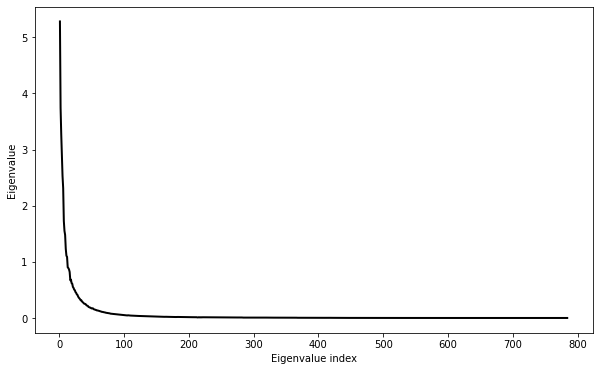

In [4]:
# plot scree graph
plt.figure(figsize = (10, 6))
plt.plot(np.arange(1, D + 1), values, color = "k", linewidth = 2)
plt.xlabel("Eigenvalue index")
plt.ylabel("Eigenvalue")
plt.show()

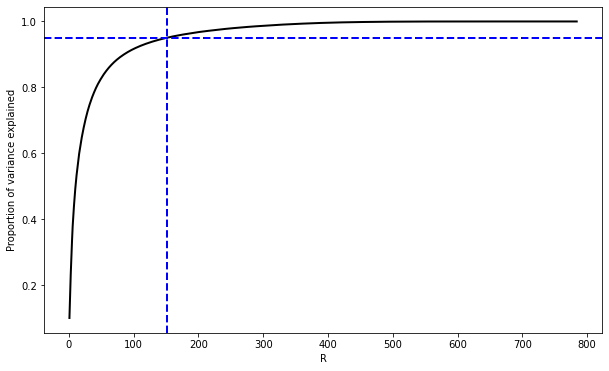

In [5]:
# plot proportion of variance explained
pove = np.cumsum(values) / np.sum(values)
plt.figure(figsize = (10, 6))
plt.plot(np.arange(1, D + 1), pove, color = "k", linewidth = 2)
plt.xlabel("R")
plt.ylabel("Proportion of variance explained")
plt.axhline(y = 0.95, linewidth = 2, linestyle = "dashed", color = "b")
plt.axvline(x = np.min(np.where(pove > 0.95)) + 1, linewidth = 2, linestyle = "dashed", color = "b")
plt.show()

## Plotting Projected Data Points

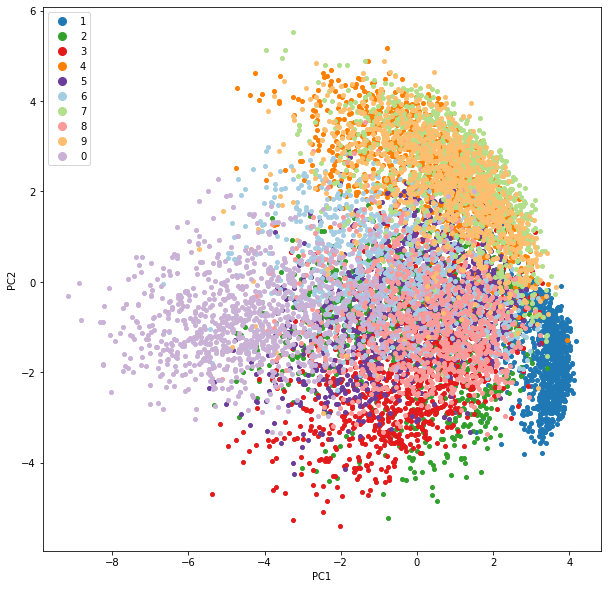

In [6]:
# calculate two-dimensional projections
Z = np.matmul(X - np.mean(X, axis = 0), vectors[:,[0, 1]])

# plot two-dimensional projections
plt.figure(figsize = (10, 10))
point_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6"])
for c in range(K):
    plt.plot(Z[y == c + 1, 0], Z[y == c + 1, 1], marker = "o", markersize = 4, linestyle = "none", color = point_colors[c])
plt.legend(["1", "2", "3", "4", "5", "6", "7", "8", "9", "0"],
           loc = "upper left", markerscale = 2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## Plotting Reconstruction Error

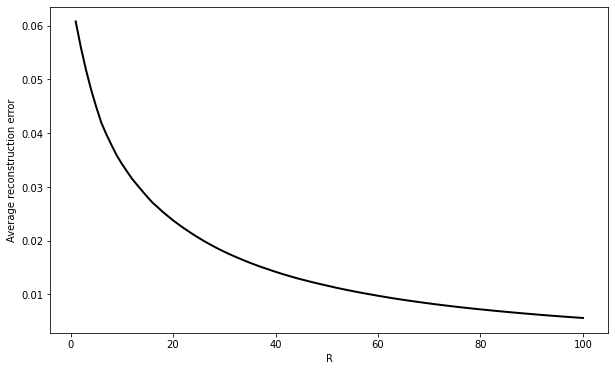

In [7]:
# calculate reconstruction error
reconstruction_error = np.zeros(min(D, 100))
for r in range(min(D, 100)):
    Z_r = np.matmul(X - np.mean(X, axis = 0), vectors[:,np.arange(0, r + 1)])
    X_reconstructed = np.matmul(Z_r, np.transpose(vectors[:,np.arange(0, r + 1)])) + np.mean(X, axis = 0)
    reconstruction_error[r] = np.mean((X - X_reconstructed)**2)

plt.figure(figsize = (10, 6))
plt.plot(np.arange(1, min(D, 100) + 1), reconstruction_error, color = "k", linewidth = 2)
plt.xlabel("R")
plt.ylabel("Average reconstruction error")
plt.show()

## Plotting Eigenvectors

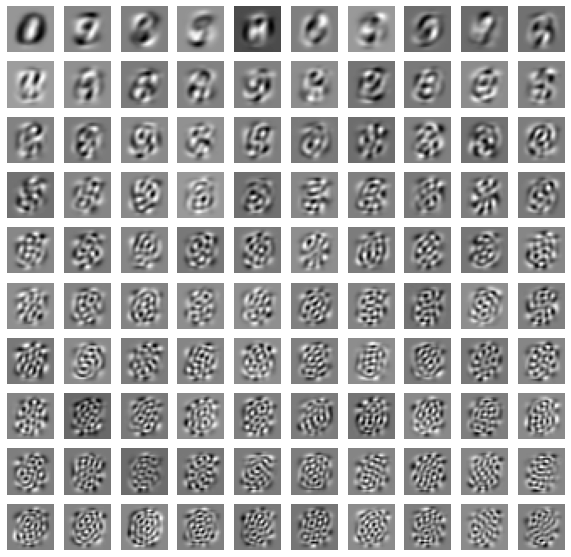

In [8]:
# plot first 100 eigenvectors
plt.figure(figsize = (10, 10))
for component in range(100):
    plt.subplot(10, 10, component + 1)
    plt.imshow(np.reshape(vectors[:, component], (28, 28), order = "C"), cmap = "gray")
    plt.axis("off")
plt.show()